In [1]:
from fredapi import Fred
import quandl as qd
import numpy as np
from datetime import datetime as dt
import pandas as pd
from pandas_datareader import data
qd.ApiConfig.api_key = "Pn4VQFgZqt6Uid7qWa_p"

%matplotlib inline


In [2]:
data_codes_fp = ('~/alex/projects/datascienceprojects/'
                 + 'macro_visualisations/ref_data/data_codes.csv')
print(data_codes_fp)

~/alex/projects/datascienceprojects/macro_visualisations/ref_data/data_codes.csv


In [3]:
data_codes = pd.read_csv(data_codes_fp,index_col=0)

In [4]:
pd.DataFrame(data_codes.columns)

,0
0,name
1,provider_code
2,code#1
3,code#2
4,code#3
5,data_provider
6,currency
7,issuer
8,asset_type
9,maturity


In [5]:
data_codes

,name,provider_code,code#1,code#2,code#3,data_provider,currency,issuer,asset_type,maturity,...,maturity_type,unit,original_data_supplier,currency_short,issuer_short,asset_type_short,maturity_short,maturity_unit_short,maturity_type_short,unit_short
my_code,,,,,,,,,,,,,,,,,,,,,
egeg1ycpy,bund_1y,BUNDESBANK/BBK01_WT3400,BUNDESBANK/BBK01_WT34,0.0,0,quandl,eur,germany,government_bond,1,...,constant,par_yield,bundesbank,e,ge,g,1,y,c,py
egeg2ycpy,bund_2y,BUNDESBANK/BBK01_WT3401,BUNDESBANK/BBK01_WT34,0.0,1,quandl,eur,germany,government_bond,2,...,constant,par_yield,bundesbank,e,ge,g,2,y,c,py
egeg3ycpy,bund_3y,BUNDESBANK/BBK01_WT3402,BUNDESBANK/BBK01_WT34,0.0,2,quandl,eur,germany,government_bond,3,...,constant,par_yield,bundesbank,e,ge,g,3,y,c,py
egeg4ycpy,bund_4y,BUNDESBANK/BBK01_WT3403,BUNDESBANK/BBK01_WT34,0.0,3,quandl,eur,germany,government_bond,4,...,constant,par_yield,bundesbank,e,ge,g,4,y,c,py
egeg5ycpy,bund_5y,BUNDESBANK/BBK01_WT3404,BUNDESBANK/BBK01_WT34,0.0,4,quandl,eur,germany,government_bond,5,...,constant,par_yield,bundesbank,e,ge,g,5,y,c,py
egeg7ycpy,bund_7y,BUNDESBANK/BBK01_WT3406,BUNDESBANK/BBK01_WT34,0.0,6,quandl,eur,germany,government_bond,7,...,constant,par_yield,bundesbank,e,ge,g,7,y,c,py
egeg10ycpy,bund_10y,BUNDESBANK/BBK01_WT3409,BUNDESBANK/BBK01_WT34,0.0,9,quandl,eur,germany,government_bond,10,...,constant,par_yield,bundesbank,e,ge,g,10,y,c,py
egeg15ycpy,bund_15y,BUNDESBANK/BBK01_WT3439,BUNDESBANK/BBK01_WT34,NaN,39,quandl,eur,germany,government_bond,15,...,constant,par_yield,bundesbank,e,ge,g,15,y,c,py
egeg20ycpy,bund_20y,BUNDESBANK/BBK01_WT3449,BUNDESBANK/BBK01_WT34,NaN,49,quandl,eur,germany,government_bond,20,...,constant,par_yield,bundesbank,e,ge,g,20,y,c,py


In [6]:
data_codes.index

Index(['egeg1ycpy', 'egeg2ycpy', 'egeg3ycpy', 'egeg4ycpy', 'egeg5ycpy',
       'egeg7ycpy', 'egeg10ycpy', 'egeg15ycpy', 'egeg20ycpy', 'egeg30ycpy'],
      dtype='object', name='my_code')

In [7]:
my_dict = dict(zip(data_codes.index, data_codes['provider_code']))

In [8]:
my_dict['egeg20ycpy']

'BUNDESBANK/BBK01_WT3449'

In [9]:
data_codes.at['egeg5ycpy','issuer']

'germany'

In [10]:
def ts_get(code, start, end, provider):
    # Get time series data from various providers
    # Returns a dataframe object
    if provider == 'quandl':
        ts = qd.get(
            code,
            start_date=start,
            end_date=end
        )
    elif provider == 'FRED':
        ts = pd.DataFrame(fred.get_series(series_id=code,
                                          observation_start=start,
                                          observation_end=end
                                          )
                          )
    return ts

In [11]:
class TimeSeries():
    # class of any time series from any data provider (hopefully!)

    def __init__(self, code='egeg5ycpy',
                 start=dt(2019, 1, 1), end=dt.today()):
        self.name = data_codes.at[code, 'name']
        self.provider_code = data_codes.at[code, 'provider_code']
        self.data_provider = data_codes.at[code, 'data_provider']
        self.currency = data_codes.at[code, 'currency']
        self.issuer = data_codes.at[code, 'issuer']
        self.asset_type = data_codes.at[code, 'asset_type']
        self.maturity = data_codes.at[code, 'maturity']
        self.maturity_unit = data_codes.at[code, 'maturity_unit']
        self.maturity_type = data_codes.at[code, 'maturity_type']
        self.unit = data_codes.at[code, 'unit']
        self.original_data_supplier = data_codes.at[code,
                                                 'original_data_supplier']
        self.start = start
        self.end = end
        self.timeseries = ts_get(self.provider_code,
                                self.start,
                                self.end,
                                self.data_provider)


In [12]:
bund5y = TimeSeries()
bund5y.timeseries.tail(10)

,Value
Date,
2019-10-08,-0.81
2019-10-09,-0.81
2019-10-10,-0.76
2019-10-11,-0.72
2019-10-14,-0.72
2019-10-15,-0.70
2019-10-16,-0.68
2019-10-17,-0.64
2019-10-18,-0.64


In [13]:
bund5y.provider_code

'BUNDESBANK/BBK01_WT3404'

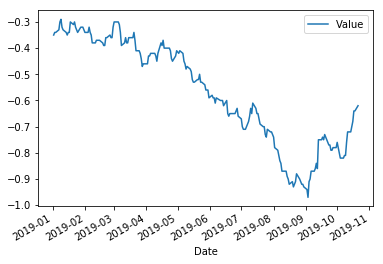

In [14]:
bund5y.timeseries.plot()

# Test for datavis library: tsget

In [15]:
from datavis import tsget as tg

In [16]:
compare = tg.TimeSeries('egeg5ycpy')

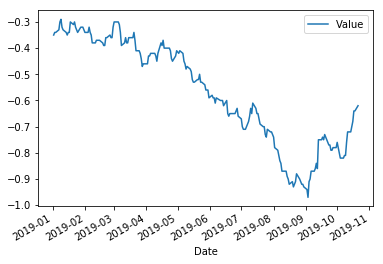

In [17]:
compare.timeseries.plot()

In [18]:
bund_curve = tg.yield_curve()
bund_curve.tail()

,bund_1y,bund_2y,bund_3y,bund_4y,bund_5y,bund_7y,bund_10y,bund_15y,bund_20y,bund_30y
Date,,,,,,,,,,
2019-10-15,-0.66,-0.72,-0.74,-0.73,-0.70,-0.62,-0.47,-0.26,-0.10,0.07
2019-10-16,-0.67,-0.72,-0.73,-0.71,-0.68,-0.58,-0.43,-0.23,-0.08,0.10
2019-10-17,-0.65,-0.69,-0.69,-0.67,-0.64,-0.54,-0.38,-0.16,-0.01,0.17
2019-10-18,-0.65,-0.69,-0.69,-0.67,-0.64,-0.55,-0.39,-0.18,-0.02,0.15
2019-10-21,-0.65,-0.69,-0.69,-0.66,-0.62,-0.51,-0.35,-0.13,0.03,0.20
